# King County Pricing Predictor
**Authors:**  Blake Elieff



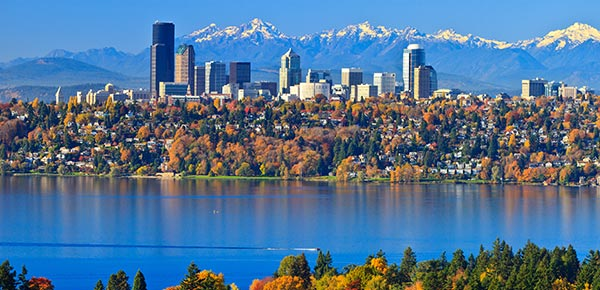

## Overview
This project it to produce a model for Century 21 that is able to predict the sale price of a house in the King County region given multiple different variables. Using this model; Century 21 are able to better provide pricing estimates for their clients when it comes to buying and selling.

## Business Problem
Century 21 want to streamline their predictions of housing prices so are outsourcing this task to an external company. Without this predictor Century 21 are wasting valuable human resources so this will free up more time for the company.

## Data Understanding

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [50]:
from functions import reg_results, features, encode, evaluate, results, linpreds

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.metrics as metrics
from statsmodels.api import OLS
from matplotlib import style
style.use('ggplot')
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From this info, i can see a few changes need to be made. Date i can change to datetime, year built and year renovated are different data types? and the sqft of basement has been put in as an object.

## Data Preparation
### Data Cleaning
I start by looking at the null values and replace them with the most frequently appearing value (0)

In [6]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['view'] = df['view'].fillna(0)

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Then i change the date to datetime format, year renovated to integer and the sale price as integer

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['yr_renovated'] = df['yr_renovated'].astype(int)
df['price'] = df['price'].astype(int)

Dropping any duplicates based on the property id

In [11]:
df.drop_duplicates(subset='id', inplace=True)

Here i start looking into what each column looks like from the dataset

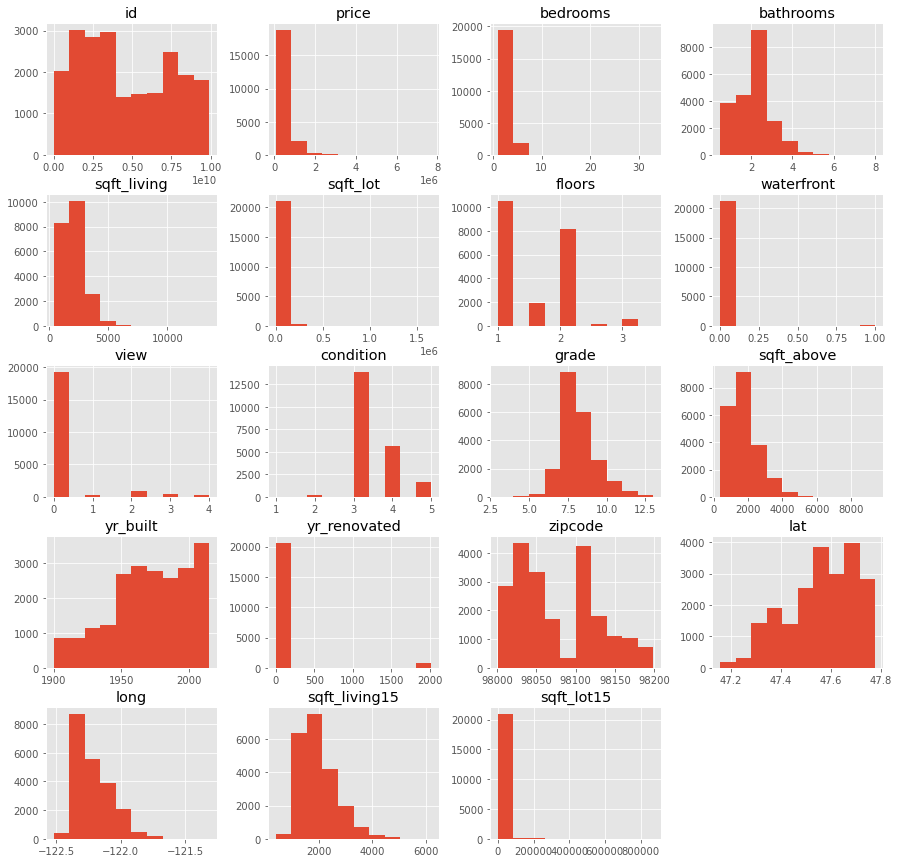

In [12]:
df.hist(figsize=(15,15));

From these plots, it seems like some of the variables require log scaling.

In [13]:
logdf = pd.DataFrame()
logcols = ['id','price','sqft_living','sqft_lot']
for col in logcols:
    if col == 'id':
        logdf[col] = df[col]
        continue
    logdf[f'{col}_log'] = df[col].map(lambda x: np.log(x))

In [14]:
df = pd.merge(df, logdf, on='id')

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,sqft_living_log,sqft_lot_log
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,8.639411
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,7.851661,8.887653
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,9.210340
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,7.580700,8.517193
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,8.997147


In [16]:
df = df.drop(['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long',
              'sqft_living15','sqft_lot15'], axis=1)

I drop columns that i do not wish to use for this model.
Below is the dataframe that i will be using

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,price_log,sqft_living_log,sqft_lot_log
0,221900,3,1.00,1180,5650,1.0,0.0,3,7,1955,12.309982,7.073270,8.639411
1,538000,3,2.25,2570,7242,2.0,0.0,3,7,1951,13.195614,7.851661,8.887653
2,180000,2,1.00,770,10000,1.0,0.0,3,6,1933,12.100712,6.646391,9.210340
3,604000,4,3.00,1960,5000,1.0,0.0,5,7,1965,13.311329,7.580700,8.517193
4,510000,3,2.00,1680,8080,1.0,0.0,3,8,1987,13.142166,7.426549,8.997147


In [18]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,price_log,sqft_living_log,sqft_lot_log
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,3.410784,7.662792,1971.092997,13.048915,7.552148,8.989676
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.650035,1.171971,29.387141,0.526726,0.424047,0.903854
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,11.264464,5.913503,6.253829
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1952.000000,12.683858,7.265430,8.525161
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,13.017003,7.560080,8.937744
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,13.377006,7.843849,9.277111
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,15.856731,9.513404,14.317109


Lets have a more in depth look into each variable

In [19]:
for col in df.columns:
    print("")
    print(col,":")
    print(df.sort_values(by=col, ascending=False).head(10))


price :
        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
7187  7700000         6       8.00        12050     27600     2.5         0.0   
3877  7060000         5       4.50        10040     37325     2.0         1.0   
9170  6890000         6       7.75         9890     31374     2.0         0.0   
4371  5570000         5       5.75         9200     35069     2.0         0.0   
1434  5350000         5       5.00         8000     23985     2.0         0.0   
1301  5300000         6       6.00         7390     24829     2.0         1.0   
1152  5110000         5       5.25         8010     45517     2.0         1.0   
8023  4670000         5       6.75         9640     13068     1.0         1.0   
2601  4500000         5       5.50         6640     40014     2.0         1.0   
8560  4490000         4       3.00         6430     27517     2.0         0.0   

      condition  grade  yr_built  price_log  sqft_living_log  sqft_lot_log  
7187          4     13

Can we really have float values for bathrooms?
Well, the following is how bathrooms are classed:
- 1/4 bath: toilet
- 1/2 bath:Sink, toilet
- 3/4 bath: any combination of 3 of the options
- full bath: Sink, shower, bathtub and a toilet

Looking through this; the main outlier i can physically see is the house with 33 bedrooms, this isnt realistic and i believe is an error in the data so i will remove this from the dataset

In [20]:
df = df[df['bedrooms'] != 33]

Below is the distribution of housing prices for my new dataframe

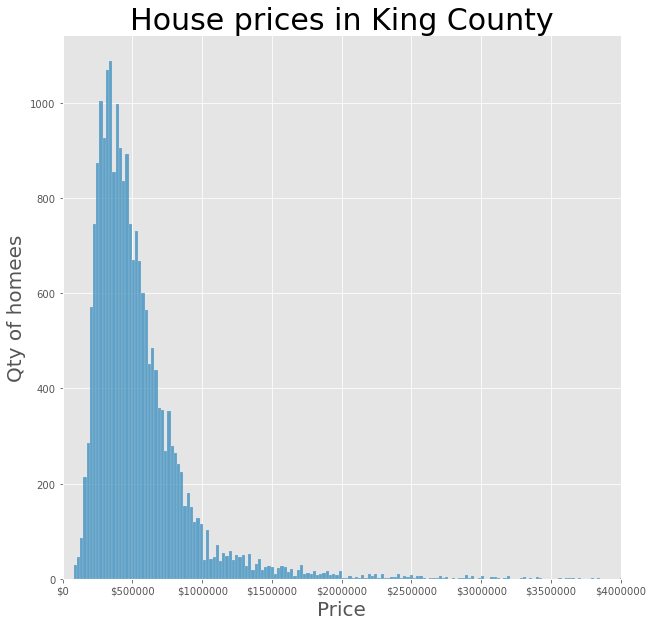

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.histplot(df['price'])

ax.set_title ('House prices in King County', fontsize=30)
ax.set_xlabel('Price', fontsize=20)
ax.set_ylabel('Qty of homees', fontsize=20)
ax.tick_params(labelsize=10)
ax.set_xlim([0,4000000])
ax.xaxis.set_major_formatter('${x:1.0f}')

Here is the median and mean of the housing data

In [22]:
print('median price:',df.price.median())
print('mean price',df.price.mean())

median price: 450000.0
mean price 540734.669685793


### Transforming Categorical Data

Below i have a look at the condition and grade variables and how i want to utilise them

In [23]:
df.condition.value_counts(normalize=True)

3    0.648957
4    0.263458
5    0.078715
2    0.007563
1    0.001307
Name: condition, dtype: float64

In [24]:
df.grade.value_counts(normalize=True)

7     0.414959
8     0.282039
9     0.121668
6     0.093142
10    0.052757
11    0.018488
5     0.010925
12    0.004109
4     0.001261
13    0.000607
3     0.000047
Name: grade, dtype: float64

In [25]:
df.groupby(by=['grade','condition']).agg(['mean','count'])['price']

mean  count
grade condition                     
3     5          2.620000e+05      1
4     1          1.500000e+05      1
      2          1.675000e+05      4
      3          2.054167e+05     12
      4          2.439050e+05     10
5     1          2.603125e+05      8
      2          2.162692e+05     13
      3          2.442031e+05     96
      4          2.452785e+05     83
      5          2.711276e+05     34
6     1          3.038136e+05     11
      2          2.650634e+05     56
      3          2.899191e+05   1006
      4          3.188210e+05    675
      5          3.104888e+05    247
7     1          3.344167e+05      6
      2          3.332005e+05     72
      3          3.848600e+05   5172
      4          4.130498e+05   2815
      5          4.786553e+05    823
8     1          9.325000e+05      2
      2          4.219962e+05     13
      3          5.100242e+05   4248
      4          5.898494e+05   1389
      5          7.367448e+05    389
9     2          7.150000e+05      2
      3          7.266860e+05   2034
      4          8.877514e+05    445
      5          1.126470e+06    125
10    2          1.755000e+06      2
      3          1.013949e+06    919
      4          1.177354e+06    156
      5          1.743189e+06     53
11    3          1.417013e+06    330
      4          1.841545e+06     55
      5          2.240909e+06     11
12    3          2.164514e+06     72
      4          2.470000e+06     13
      5          2.290000e+06      3
13    3          3.340000e+06     11
      4          5.750000e+06      2

This looks pretty messy so im going to summarise the groups. I'm going to run with a basic bad and good for condition, and low-medium-high for grade.

In [26]:
df['condition'].replace([1,2,3],'bad_condition', inplace=True)
df['condition'].replace([4,5],'good_condition', inplace=True)

df['grade'].replace([1,2,3,4,5], 'low_grade', inplace=True)
df['grade'].replace([6,7,8,9,10], 'medium_grade', inplace=True)
df['grade'].replace([11,12,13,14,15], 'high_grade', inplace=True)

In [27]:
df.groupby(by=['grade','condition']).agg(['mean','count'])['price']

mean  count
grade        condition                          
high_grade   bad_condition   1.598545e+06    413
             good_condition  2.100179e+06     84
low_grade    bad_condition   2.359888e+05    134
             good_condition  2.521680e+05    128
medium_grade bad_condition   5.106040e+05  13543
             good_condition  5.292079e+05   7117

In [28]:
df.groupby(by=['condition','grade']).agg(['mean','count'])['price']

mean  count
condition      grade                            
bad_condition  high_grade    1.598545e+06    413
               low_grade     2.359888e+05    134
               medium_grade  5.106040e+05  13543
good_condition high_grade    2.100179e+06     84
               low_grade     2.521680e+05    128
               medium_grade  5.292079e+05   7117

This looks much better!

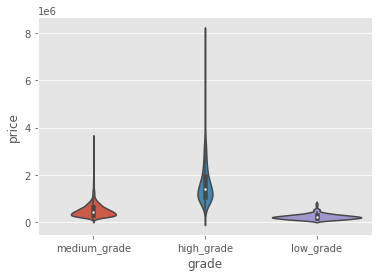

In [29]:
sns.violinplot(x='grade',y=df['price'], data=df)

ax.set_title('Grade of homes', fontsize=30)
ax.set_xlabel('Grade', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.tick_params(labelsize=10)
ax.yaxis.set_major_formatter('${x:1.0f}');

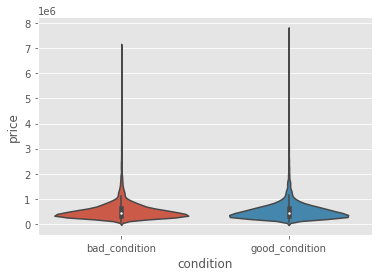

In [30]:
sns.violinplot(x='condition',y=df['price'], data=df)

ax.set_title('Condition of homes', fontsize=30)
ax.set_xlabel('Condition', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.tick_params(labelsize=10)
ax.yaxis.set_major_formatter('${x:1.0f}');

As we can see in these violin plots, having a good condition and a high grade has a large effect on the dataset

### One-Hot Encoding Categorical Data

Here i use a function that utilises SkLearn's one hot encoder function

In [31]:
condition_encode = encode(df, 'condition')
grade_encode = encode(df, 'grade')

In [32]:
df = pd.concat([df, condition_encode, grade_encode], axis=1).drop(columns=['condition','grade'])

In [33]:
df['high_grade'] = 1 - df['low_grade'] - df['medium_grade']
df['bad_condition'] = 1 - df['good_condition']

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,price_log,sqft_living_log,sqft_lot_log,good_condition,low_grade,medium_grade,high_grade,bad_condition
0,221900,3,1.00,1180,5650,1.0,0.0,1955,12.309982,7.073270,8.639411,0.0,0.0,1.0,0.0,1.0
1,538000,3,2.25,2570,7242,2.0,0.0,1951,13.195614,7.851661,8.887653,0.0,0.0,1.0,0.0,1.0
2,180000,2,1.00,770,10000,1.0,0.0,1933,12.100712,6.646391,9.210340,0.0,0.0,1.0,0.0,1.0
3,604000,4,3.00,1960,5000,1.0,0.0,1965,13.311329,7.580700,8.517193,1.0,0.0,1.0,0.0,0.0
4,510000,3,2.00,1680,8080,1.0,0.0,1987,13.142166,7.426549,8.997147,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,360000,3,2.50,1530,1131,3.0,0.0,2009,12.793859,7.333023,7.030857,0.0,0.0,1.0,0.0,1.0
21416,400000,4,2.50,2310,5813,2.0,0.0,2014,12.899220,7.745003,8.667852,0.0,0.0,1.0,0.0,1.0
21417,402101,2,0.75,1020,1350,2.0,0.0,2009,12.904459,6.927558,7.207860,0.0,0.0,1.0,0.0,1.0
21418,400000,3,2.50,1600,2388,2.0,0.0,2004,12.899220,7.377759,7.778211,0.0,0.0,1.0,0.0,1.0


Great! now lets have a look at how each variable correlates

In [35]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,price_log,sqft_living_log,sqft_lot_log,good_condition,low_grade,medium_grade,high_grade,bad_condition
price,1.000000,0.316721,0.526239,0.701887,0.089114,0.256303,0.264899,0.052918,0.891581,0.611742,0.161570,0.003215,-0.089781,-0.336380,0.478633,-0.003215
bedrooms,0.316721,1.000000,0.528912,0.594217,0.033634,0.183556,-0.002133,0.160352,0.351601,0.638490,0.190835,0.004518,-0.131991,-0.036698,0.141436,-0.004518
bathrooms,0.526239,0.528912,1.000000,0.755519,0.087775,0.501795,0.063633,0.506244,0.551553,0.761852,0.100775,-0.176575,-0.148787,-0.160017,0.305138,0.176575
sqft_living,0.701887,0.594217,0.755519,1.000000,0.172582,0.352856,0.104736,0.316633,0.695280,0.954597,0.345079,-0.089670,-0.137153,-0.271920,0.434062,0.089670
sqft_lot,0.089114,0.033634,0.087775,0.172582,1.000000,-0.005571,0.021429,0.052305,0.099544,0.149518,0.638384,0.003680,0.022770,-0.091185,0.095352,-0.003680
floors,0.256303,0.183556,0.501795,0.352856,-0.005571,1.000000,0.020575,0.488917,0.310337,0.366395,-0.238045,-0.309892,-0.084901,-0.057995,0.133207,0.309892
waterfront,0.264899,-0.002133,0.063633,0.104736,0.021429,0.020575,1.000000,-0.024846,0.171266,0.078974,0.072508,0.016795,0.011430,-0.085404,0.096533,-0.016795
yr_built,0.052918,0.160352,0.506244,0.316633,0.052305,0.488917,-0.024846,1.000000,0.079685,0.348198,-0.007863,-0.380317,-0.135525,-0.007782,0.108507,0.380317
price_log,0.891581,0.351601,0.551553,0.695280,0.099544,0.310337,0.171266,0.079685,1.000000,0.674862,0.138580,-0.003968,-0.157493,-0.186474,0.343984,0.003968
sqft_living_log,0.611742,0.638490,0.761852,0.954597,0.149518,0.366395,0.078974,0.348198,0.674862,1.000000,0.326818,-0.082480,-0.200082,-0.136839,0.314127,0.082480


In [36]:
dfcorrp = df[['price_log','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_living_log','sqft_lot_log',
             'good_condition','low_grade','medium_grade','high_grade','bad_condition']]
dfcorr = dfcorrp.corr().sort_values('price_log',ascending=False)['price_log']
dfcorr.drop(index=['price_log'], inplace=True)
dfcorr

sqft_living        0.695280
sqft_living_log    0.674862
bathrooms          0.551553
bedrooms           0.351601
high_grade         0.343984
floors             0.310337
sqft_lot_log       0.138580
sqft_lot           0.099544
bad_condition      0.003968
good_condition    -0.003968
low_grade         -0.157493
medium_grade      -0.186474
Name: price_log, dtype: float64

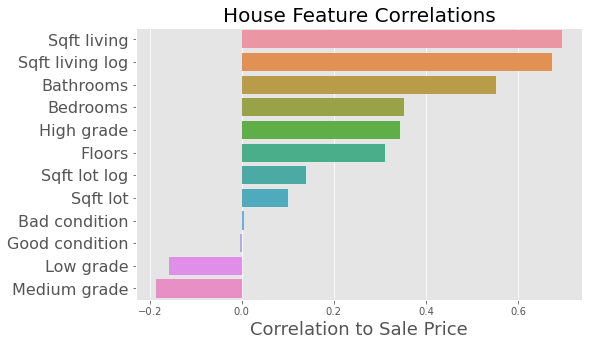

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=dfcorr.values, y=dfcorr.index, orient='h')
ylabels = [item.capitalize() for item in dfcorr.index]
ylabels = [item.split('_') for item in ylabels]
ylabels = [' '.join(item) for item in ylabels]
ax.set_yticklabels(ylabels, size=16)
ax.tick_params(axis='x', which='major', labelsize=10)
ax.set_xlabel('Correlation to Sale Price', size=18)
ax.set_title('House Feature Correlations', size=20);

So i can see that sqft living is the highest correlating, followed by bathrooms, bedrooms, high grade and floors..

# Model Building
## Train Test

Here i split up the dataframe into a testing and training set.I will create my model using components of the training data and then use my testing data to analyse. 

We will start by dropping the price (targets) for the X variable

In [38]:
X = df.drop(columns=['price_log','price'])
X_train, X_test, y_train, y_test = train_test_split(X,df['price_log'], test_size=.33, random_state=40)

In [39]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,sqft_living_log,sqft_lot_log,good_condition,low_grade,medium_grade,high_grade,bad_condition
count,14350.000000,14350.000000,14350.000000,1.435000e+04,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000
mean,3.378118,2.125226,2087.919652,1.500526e+04,1.497770,0.006899,1971.099721,7.554658,8.991317,0.341533,0.011707,0.965226,0.023066,0.658467
std,0.904389,0.773367,925.541998,3.960011e+04,0.539242,0.082776,29.305327,0.422622,0.901585,0.474240,0.107569,0.183212,0.150119,0.474240
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1900.000000,5.913503,6.253829,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,1952.000000,7.265430,8.525161,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,2.250000,1920.000000,7.635000e+03,1.500000,0.000000,1975.000000,7.560080,8.940498,0.000000,0.000000,1.000000,0.000000,1.000000
75%,4.000000,2.500000,2560.000000,1.075700e+04,2.000000,0.000000,1997.000000,7.847763,9.283312,1.000000,0.000000,1.000000,0.000000,1.000000
max,11.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,2015.000000,9.513404,13.968055,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_test.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,sqft_living_log,sqft_lot_log,good_condition,low_grade,medium_grade,high_grade,bad_condition
count,7069.000000,7069.000000,7069.000000,7.069000e+03,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000
mean,3.361296,2.104682,2073.480549,1.537856e+04,1.492432,0.006649,1971.082756,7.547076,8.986386,0.343471,0.013297,0.963220,0.023483,0.656529
std,0.900171,0.759109,905.022257,4.520162e+04,0.541807,0.081274,29.555279,0.426936,0.908555,0.474901,0.114554,0.188235,0.151442,0.474901
min,1.000000,0.750000,390.000000,6.090000e+02,1.000000,0.000000,1900.000000,5.966147,6.411818,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1420.000000,5.030000e+03,1.000000,0.000000,1951.000000,7.258412,8.523175,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,2.250000,1920.000000,7.561000e+03,1.500000,0.000000,1975.000000,7.560080,8.930759,0.000000,0.000000,1.000000,0.000000,1.000000
75%,4.000000,2.500000,2540.000000,1.055000e+04,2.000000,0.000000,1997.000000,7.839919,9.263881,1.000000,0.000000,1.000000,0.000000,1.000000
max,10.000000,6.750000,9200.000000,1.651359e+06,3.500000,1.000000,2015.000000,9.126959,14.317109,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
y_train.describe()

count    14350.000000
mean        13.049574
std          0.525770
min         11.264464
25%         12.685408
50%         13.017003
75%         13.377006
max         15.856731
Name: price_log, dtype: float64

In [42]:
y_test.describe()

count    7069.000000
mean       13.047532
std         0.528719
min        11.314475
25%        12.679196
50%        13.017003
75%        13.377006
max        15.532906
Name: price_log, dtype: float64

Here i scale all of the data

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [44]:
X_train_scaled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,sqft_living_log,sqft_lot_log,good_condition,low_grade,medium_grade,high_grade,bad_condition
11527,-1.523865,-0.808475,-1.013409,-0.188220,-0.923124,-0.083348,-0.924769,-1.200027,-0.068492,-0.720194,-0.108839,0.189806,-0.153658,0.720194
1504,-0.418107,-0.808475,-0.667653,-0.004653,-0.923124,-0.083348,-0.447024,-0.619109,0.679364,1.388515,-0.108839,0.189806,-0.153658,-1.388515
12526,0.687650,-0.161929,0.812612,-0.041372,-0.923124,-0.083348,-0.651772,0.939173,0.564833,-0.720194,-0.108839,0.189806,-0.153658,0.720194
11489,-0.418107,0.484617,0.456052,-0.239964,0.931395,-0.083348,0.815589,0.646889,-0.419574,-0.720194,-0.108839,0.189806,-0.153658,0.720194
2896,-0.418107,0.484617,-0.192240,-0.254156,0.931395,-0.083348,0.952088,0.000475,-0.539063,-0.720194,-0.108839,0.189806,-0.153658,0.720194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,-0.418107,-0.485202,0.812612,-0.131450,-0.923124,-0.083348,0.201345,0.939173,0.220531,1.388515,-0.108839,0.189806,-0.153658,-1.388515
16066,-0.418107,-0.161929,-0.592019,-0.168926,-0.923124,-0.083348,-0.583522,-0.509030,0.038400,1.388515,-0.108839,0.189806,-0.153658,-1.388515
14501,-0.418107,-1.455021,-0.527190,-0.193978,-0.923124,-0.083348,-0.447024,-0.418589,-0.102496,1.388515,-0.108839,0.189806,-0.153658,-1.388515
14555,-0.418107,0.484617,-0.246264,0.711253,0.931395,-0.083348,0.508467,-0.062294,1.865207,-0.720194,-0.108839,0.189806,-0.153658,0.720194


# Base model

In [45]:
train_target_mean = y_train.mean()
baseline_train_pred = [train_target_mean] * len(y_train)
baseline_test_pred = [train_target_mean] * len(y_test)

Train R2 score: -0.041991156305299704 
Test R2 score: -0.04354948515304957 

Train RMSE: $379,186.22 
Test RMSE: $368,412.79 

Train MAE: $222,066.62 
Test MAE: $223,236.51 

Scatter of residuals:


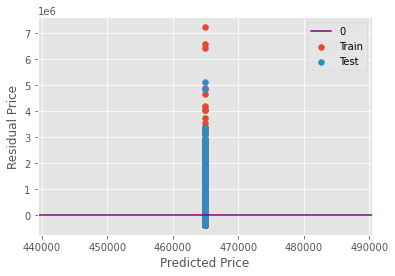

QQ Plot of residuals:


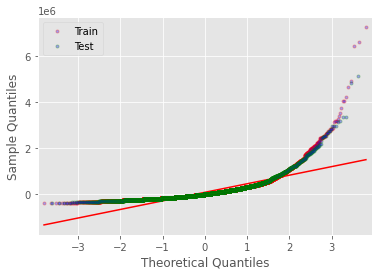

In [46]:
evaluate(y_train, y_test, baseline_train_pred, baseline_test_pred)

So to start we are going to begin with the log scaled square foot if living area data. This is the highest correlating variable from the dataset.

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [48]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,sqft_living_log,sqft_lot_log,good_condition,low_grade,medium_grade,high_grade,bad_condition
11527,2,1.50,1150,7552,1.0,0.0,1944,7.047517,8.929568,0.0,0.0,1.0,0.0,1.0
1504,3,1.50,1470,14821,1.0,0.0,1958,7.293018,9.603800,1.0,0.0,1.0,0.0,0.0
12526,4,2.00,2840,13367,1.0,0.0,1952,7.951559,9.500544,0.0,0.0,1.0,0.0,1.0
11489,3,2.50,2510,5503,2.0,0.0,1995,7.828038,8.613049,0.0,0.0,1.0,0.0,1.0
2896,3,2.50,1910,4941,2.0,0.0,1999,7.554859,8.505323,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,3,1.75,2840,9800,1.0,0.0,1977,7.951559,9.190138,1.0,0.0,1.0,0.0,0.0
16066,3,2.00,1540,8316,1.0,0.0,1954,7.339538,9.025937,1.0,0.0,1.0,0.0,0.0
14501,3,1.00,1600,7324,1.0,0.0,1958,7.377759,8.898912,1.0,0.0,1.0,0.0,0.0
14555,3,2.50,1860,43170,2.0,0.0,1986,7.528332,10.672901,0.0,0.0,1.0,0.0,1.0


In [51]:
linpreds(X_train,y_train,X_test)

(array([12.73163636, 12.76508802, 13.30447516, ..., 12.83425521,
        12.90731778, 13.24231323]),
 array([13.10917341, 12.74820199, 12.90459122, ..., 12.82003679,
        13.23404272, 13.26551294]))

Train R2 score: 0.4267810471582941 
Test R2 score: 0.41347982037291686 

Train RMSE: $281,242.40 
Test RMSE: $276,197.44 

Train MAE: $167,545.36 
Test MAE: $171,131.23 

Scatter of residuals:


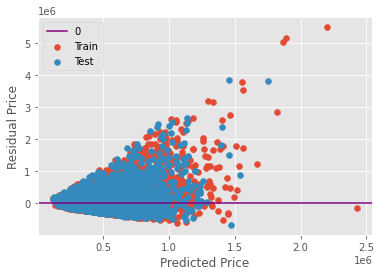

QQ Plot of residuals:


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28fb62489d0>,
 None)

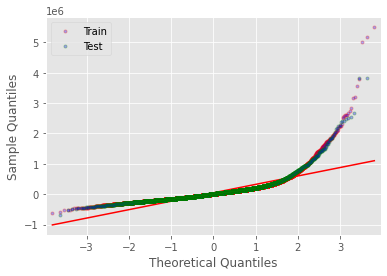

In [52]:
results(X_train, X_test, y_train, y_test, ['sqft_living_log'])

### Training
To train my model further, ill start to adding other high correlating variables

In [53]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'yr_built', 'sqft_living_log', 'sqft_lot_log',
       'good_condition', 'low_grade', 'medium_grade', 'high_grade',
       'bad_condition'],
      dtype='object')

Train R2 score: 0.44044952409339966 
Test R2 score: 0.42313882953628923 

Train RMSE: $277,869.04 
Test RMSE: $273,913.75 

Train MAE: $166,728.90 
Test MAE: $170,645.43 

Scatter of residuals:


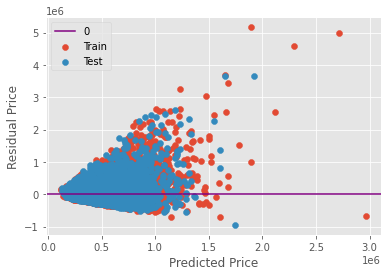

QQ Plot of residuals:


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28fb6251130>,
 None)

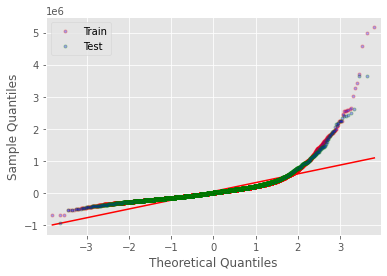

In [54]:
results(X_train, X_test, y_train, y_test, ['sqft_living_log','bathrooms'])

This brought my r2 score up a little bit, lets keep testing

Train R2 score: 0.45474113912849634 
Test R2 score: 0.4388765938064013 

Train RMSE: $274,297.53 
Test RMSE: $270,151.49 

Train MAE: $164,567.56 
Test MAE: $168,620.53 

Scatter of residuals:


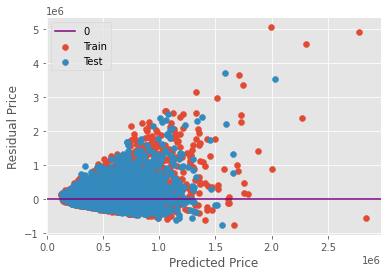

QQ Plot of residuals:


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28fb62fdd00>,
 None)

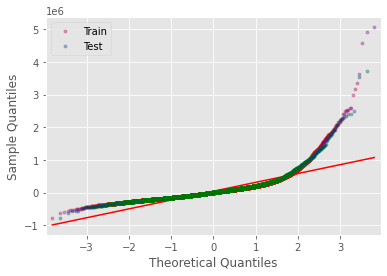

In [55]:
results(X_train, X_test, y_train, y_test, ['sqft_living_log','bathrooms','bedrooms'])

Train R2 score: 0.5335294704279727 
Test R2 score: 0.5050371272597636 

Train RMSE: $253,707.11 
Test RMSE: $253,725.72 

Train MAE: $159,903.15 
Test MAE: $164,280.39 

Scatter of residuals:


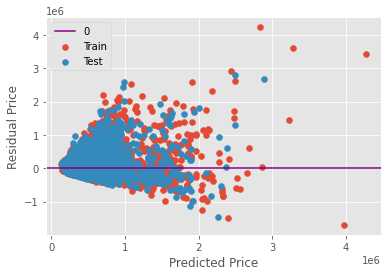

QQ Plot of residuals:


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x28fb6248c40>,
 None)

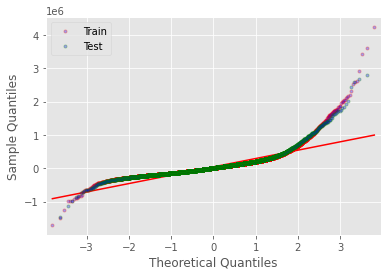

In [56]:
results(X_train, X_test, y_train, y_test, ['sqft_living_log','bathrooms','bedrooms','high_grade','good_condition'])

**The highest R2 score that ive been able to achieve is by using the following features:**
   - Sqft_Living_log
   - Bathrooms
   - Bedrooms
   - High_Grade
   - Good_Condition

# Final Model

For my final model i isolate the features that im going to use

In [57]:
X_train_final = X_train[['sqft_living_log','bathrooms','bedrooms','high_grade','good_condition']]

In [58]:
model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

Now im going to create a function that takes in the given values for each feature and return the predicted price for the house

In [59]:
def predict(sqft_living,bathrooms,bedrooms,grade, condition):
    '''
    sqft living = The square foot of living area of the property
    bathrooms = number of bathrooms
    bedrooms = number of bedrooms
    grade = numbered grade of the property
    condition = numbered condition of the property'''
    
    sqft_living_log = np.log(sqft_living)
    
    bathrooms = bathrooms
    bedrooms = bedrooms
    
    if grade > 10:
        high_grade = 1
    else: high_grade = 0
    
    if condition > 3:
        good_condition = 1
    else: good_condition = 0
    
    X = [[sqft_living_log,bathrooms,bedrooms,high_grade, good_condition]]
    
    price = np.exp(model.predict(X))
    print('$',round(float(price),2))

#### Testing of my model:

In [93]:
X_train.median()

bedrooms              3.000000
bathrooms             2.250000
sqft_living        1920.000000
sqft_lot           7635.000000
floors                1.500000
waterfront            0.000000
yr_built           1975.000000
sqft_living_log       7.560080
sqft_lot_log          8.940498
good_condition        0.000000
low_grade             0.000000
medium_grade          1.000000
high_grade            0.000000
bad_condition         1.000000
dtype: float64

In [94]:
predict(sqft_living=1920,
       bathrooms=2.25,
       bedrooms=3,
       grade=6,
       condition=2)

$ 465770.79


In [95]:
predict(sqft_living=1920,
       bathrooms=3.25,
       bedrooms=3,
       grade=6,
       condition=2)

$ 500883.46


In [96]:
predict(sqft_living=1920,
       bathrooms=2.25,
       bedrooms=3,
       grade=6,
       condition=2)

$ 465770.79


In [99]:
predict(sqft_living=1921,
       bathrooms=2.25,
       bedrooms=3,
       grade=6,
       condition=2)

$ 465965.49


In [100]:
predict(sqft_living=1920,
       bathrooms=2.25,
       bedrooms=3,
       grade=6,
       condition=2)

$ 465770.79


In [102]:
predict(sqft_living=1920,
       bathrooms=2.25,
       bedrooms=3,
       grade=11,
       condition=2)

$ 741788.67
